In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
accident_data = pd.read_csv('US_Accidents_Dec21_updated.csv')
i=0
features = accident_data.iloc[:1000, [25,27]].values
result = accident_data.iloc[:1000, 1].values

for x in features:
    if(np.isnan(x[1])):
        x[1] = 0
        
    if(np.isnan(x[0])):
#         print("Is NAN")
#         print(x)
#         features = np.delete(features,i,0)
        x[0] = 0
#     i +=1
print(features.size)
# print(newTable.size)
print(result.size)

AttributeError: module 'numpy' has no attribute 'isna'

In [13]:
from sklearn.model_selection import train_test_split
features_Train, features_Test, result_Train, result_Test = train_test_split(features, result, test_size = 0.25, random_state = 0)


In [9]:
# data = pd.read_csv('Social_Network_Ads.csv')
# X = data.iloc[:, [2,3]].values
# Y = data.iloc[:, 4].values

# print(X.size)
# print(Y.size)



800
400


In [14]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
features_Train = sc_X.fit_transform(features_Train)
features_Test = sc_X.transform(features_Test)

In [15]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(features_Train, result_Train)


SVC(kernel='linear', random_state=0)

In [16]:
# Predicting the test set results

Result_Pred = classifier.predict(features_Test)

In [17]:
# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(result_Test, Result_Pred)

In [20]:
# Visualising the Training set results

from matplotlib.colors import ListedColormap
X_Set, Y_Set = features_Train, result_Train
print(X_Set)
# X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
#                      np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
# plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(Y_Set)):
#     plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
#                 c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Support Vector Machine (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

[[-1.06726083 -0.9644378 ]
 [ 0.37526944 -0.58388671]
 [ 0.37526944  1.12032035]
 ...
 [-0.77875477 -0.58388671]
 [-1.35576688 -0.7824351 ]
 [ 0.6637755  -0.20333562]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


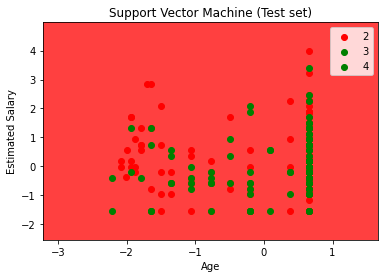

In [19]:
# Visualising the Test set results

from matplotlib.colors import ListedColormap
X_Set, Y_Set = features_Test, result_Test
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Machine (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()